In [1]:
import pandas as pd

In [3]:
df=pd.read_csv('train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df[df['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [7]:
# Missing Completely at Random (MCAR)"Embarked"

# MIssing data not at random(MNAR): also called: Systematic missing values

#There is absolutely some relationship between the data missing and any other values, observed or missing,
within the dataset.

In [10]:
import numpy as np

df['cabin_null']=np.where(df['Cabin'].isnull(),1,0)

#find the percentage of null values

df['cabin_null']

0      1
1      0
2      1
3      0
4      1
      ..
886    1
887    0
888    1
889    0
890    1
Name: cabin_null, Length: 891, dtype: int32

In [11]:
df['cabin_null'].mean()

0.7710437710437711

In [12]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [18]:
df.groupby(['Survived']).mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,cabin_null
Survived,,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887,0.876138
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408,0.602339


In [19]:
#Missing at Random

Men--Salary
Women--age

## mean/median/mode imputation

when shold we apply that?

when the data are missing completely at random(MCAR)

In [22]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [24]:
## Lets go and check % of null vaues
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [34]:
def imput_nan(df,variable,median):
    df[variable+'Median']=df[variable].fillna(median)

In [35]:
median=df['Age'].median()
median

28.0

In [36]:
imput_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,AgeAge,AgeMedian
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [43]:
df.drop(['AgeAge'],axis=1)

,Survived,Age,Fare,AgeMedian
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0
...,...,...,...,...
886,0,27.0,13.0000,27.0
887,1,19.0,30.0000,19.0
888,0,NaN,23.4500,28.0
889,1,26.0,30.0000,26.0


In [44]:
print(df['Age'].std())
print(df['AgeMedian'].std())

14.526497332334042
13.019696550973201


In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

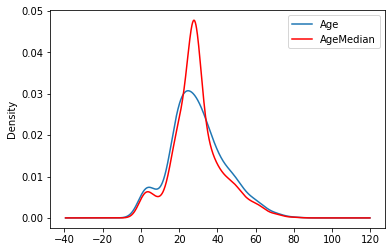

In [48]:
fig=plt.figure()
ax=fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax)
df['AgeMedian'].plot(kind='kde',ax=ax, color='red')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

### Advantages and Disadvantages of mean/median imputation

### Advatages

1.Easy to Implement(Robust to outliers)
2.faster Way to obtain full dataset

### Disadvatages
1.Change or Distrotion in the original variance